In [9]:
import numpy as np 
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-9-7a684fff1d65>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [10]:

warnings.filterwarnings('ignore')

In [13]:

df = pd.read_csv("tesla-stock-price.csv")
df.tail()


,date,close,volume,open,high,low
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70


In [36]:
df.head()


,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [17]:
print(df.head())
print(df.shape)
print(df.columns)

         date   close         volume    open    high       low
0       11:34  270.49      4,787,699  264.50  273.88  262.2400
1  2018/10/15  259.59   6189026.0000  259.06  263.28  254.5367
2  2018/10/12  258.78   7189257.0000  261.00  261.99  252.0100
3  2018/10/11  252.23   8128184.0000  257.53  262.25  249.0300
4  2018/10/10  256.88  12781560.0000  264.61  265.51  247.7700
(757, 6)
Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')


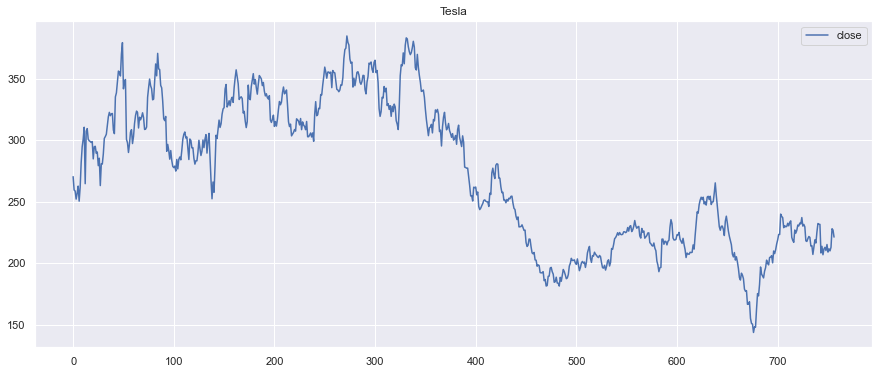

In [18]:
df[['close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

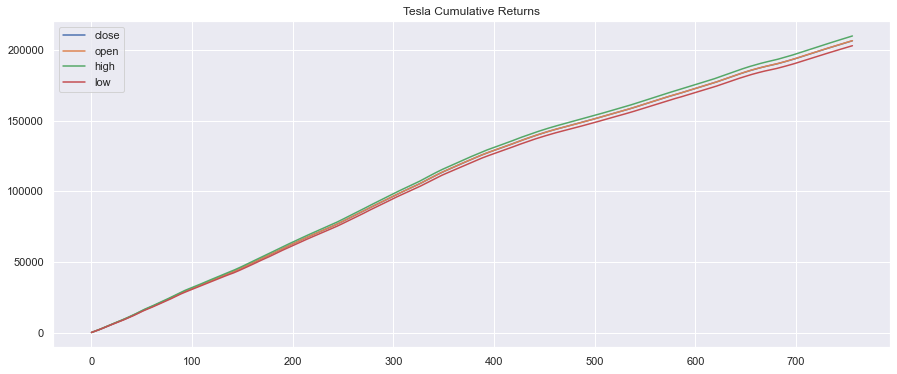

In [19]:
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Tesla Autocorrelation plot')

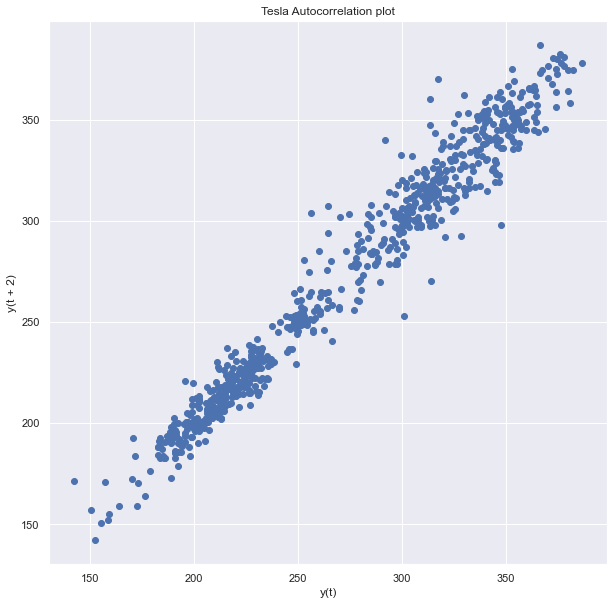

In [38]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=2)
plt.title('Tesla Autocorrelation plot')

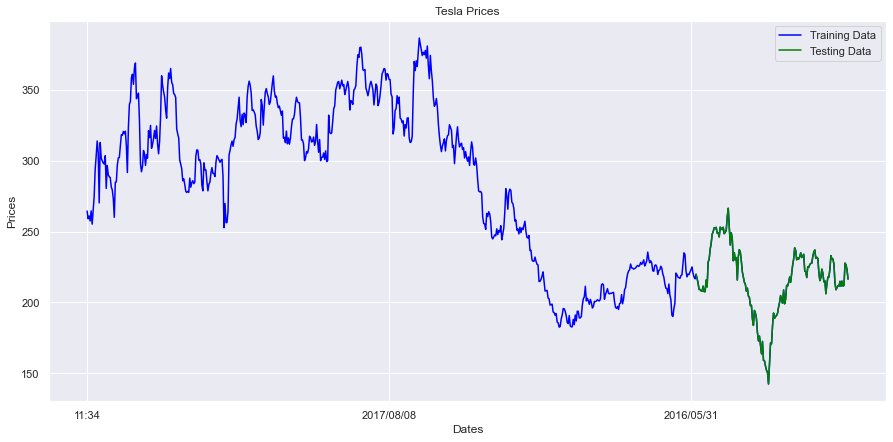

In [25]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(15,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,756, 300), df['date'][0:756:300])
plt.legend()

In [27]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [28]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print(' Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 38.558
Symmetric mean absolute percentage error: 12.875


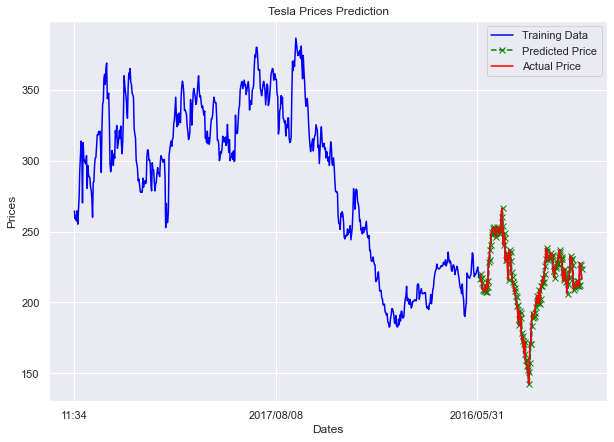

In [39]:
plt.figure(figsize=(10,7))
plt.plot(df['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='x', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,756, 300), df['date'][0:756:300])
plt.legend()

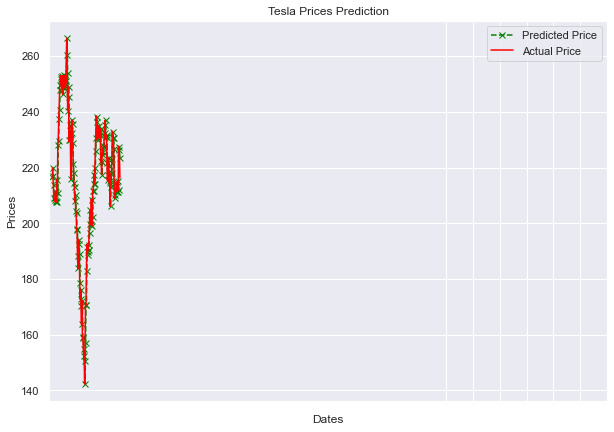

In [40]:
plt.figure(figsize=(10,7))
plt.plot(test_data.index, predictions, color='green', marker='x', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [43]:
tsd=df['close']

In [44]:
from statsmodels.tsa.stattools import adfuller

results=adfuller(tsd,autolag='AIC')
print(results)

(-1.3966348756374576, 0.5838883339076915, 11, 745, {'1%': -3.4391580196774494, '5%': -2.8654273226340554, '10%': -2.5688400274762397}, 5024.486692480989)


In [46]:
print('ADF Statistic: %f' % results[0])

print('p-value: %f' % results[1])

print('Critical Values:')

for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))
if results[0] < results[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.396635
p-value: 0.583888
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary


In [47]:
tsd1=tsd-tsd.shift(1)
tsd1=tsd1.dropna()

In [48]:
diff_results=adfuller(tsd1,autolag='AIC')
print(diff_results)

(-9.559729818416264, 2.444199889780675e-16, 10, 745, {'1%': -3.4391580196774494, '5%': -2.8654273226340554, '10%': -2.5688400274762397}, 5017.458342427995)


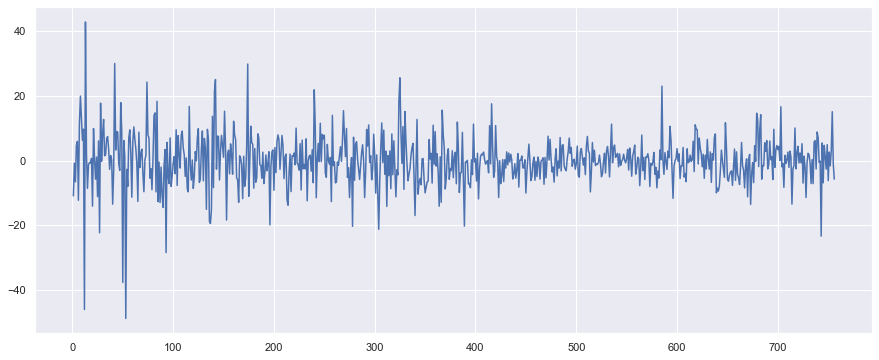

In [49]:
plt.plot(tsd1)
plt.show()

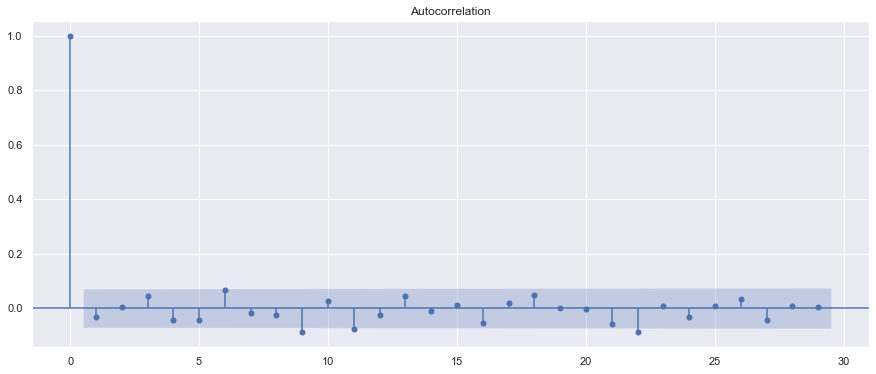

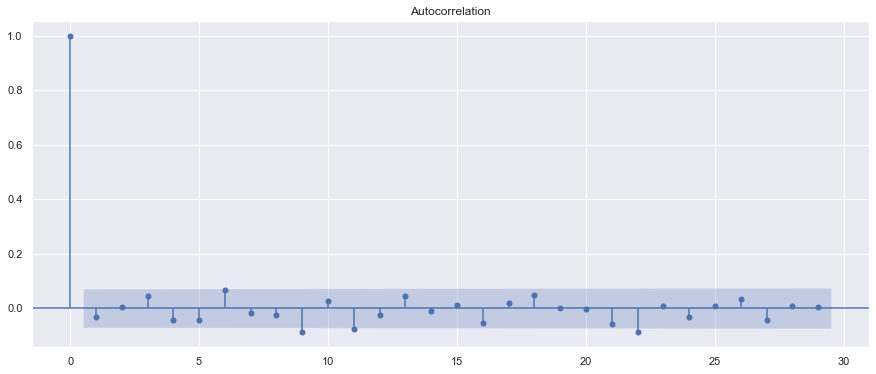

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(tsd1)

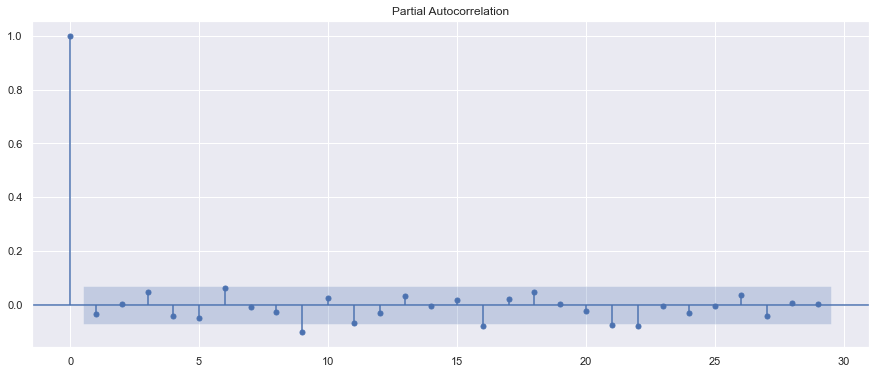

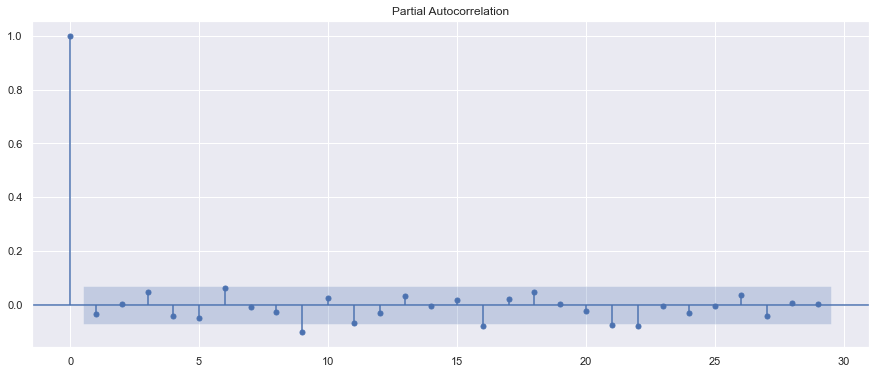

In [51]:
plot_pacf(tsd1)

In [52]:
df.shape

(757, 6)

In [53]:
tstrain=tsd[0:650]
tstest=tsd[650:]

print('train shape:' ,tstrain.shape)
print('test shape:' ,tstest.shape)

train shape: (650,)
test shape: (107,)


In [54]:
model=ARIMA(tstrain,order=(1,1,1))
fit_model=model.fit()

In [55]:
model1=ARIMA(tstrain,order=(1,1,8))
fit_model1=model1.fit()

In [56]:
model2=ARIMA(tstrain,order=(1,1,9))
fit_model2=model2.fit()

In [57]:
print('model-aic:',fit_model.aic)
print('model1-aic:',fit_model1.aic)
print('model2-aic:',fit_model2.aic)

model-aic: 4541.009065840573
model1-aic: 4535.2766923740655
model2-aic: 4535.599696815289


In [58]:
print(fit_model2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  649
Model:                 ARIMA(1, 1, 9)   Log Likelihood               -2255.800
Method:                       css-mle   S.D. of innovations              7.820
Date:                Tue, 17 May 2022   AIC                           4535.600
Time:                        15:29:16   BIC                           4589.305
Sample:                             1   HQIC                          4556.432
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0529      0.243     -0.218      0.827      -0.528       0.422
ar.L1.D.close    -0.4404      0.224     -1.970      0.049      -0.879      -0.002
ma.L1.D.close     0.4119      0.224     

In [60]:
residuals=pd.DataFrame(fit_model2.resid)
residuals=residuals.iloc[1:]
residuals.describe()

,0
count,648.000000
mean,0.021731
std,7.823245
min,-44.097250
25%,-3.915275
50%,0.026349
75%,3.686975
max,42.458451


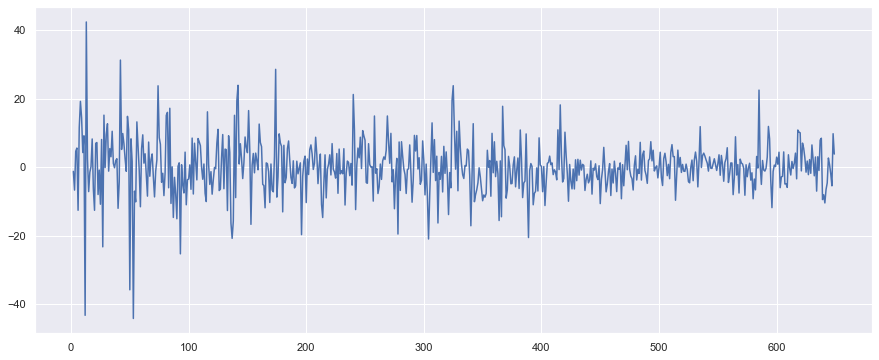

In [61]:
plt.plot(residuals)
plt.show()

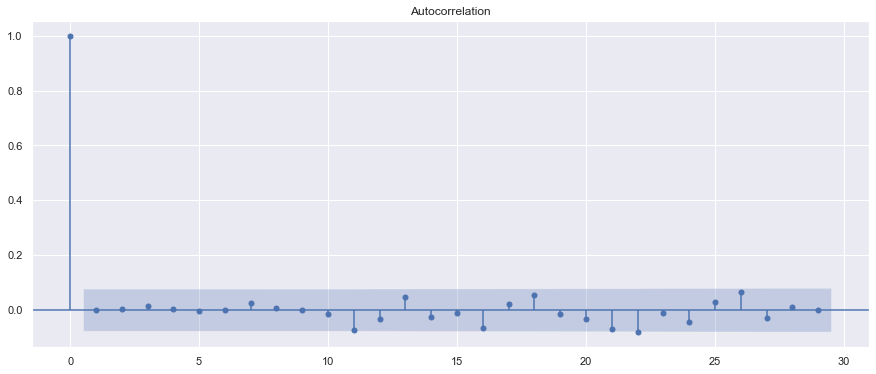

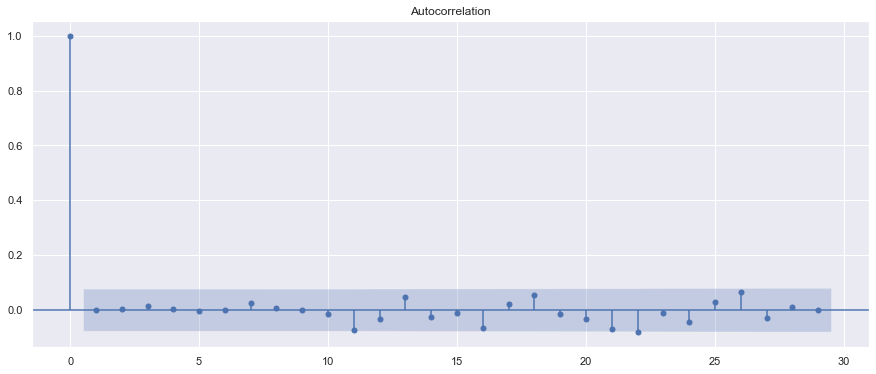

In [62]:
plot_acf(residuals)